# **Customer Life Time Value**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [ ]:
# Connect to google drive using the following commands:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import dataset
df = pd.read_excel('/content/drive/My Drive/Datasets/data_retail.xlsx')

df.head()

,PERIODE,INVOINCENO,BRANCH_SPLR,BRANCHNAME_SPLR,CUSTID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME,ITEMID,BARCODEID,PRODUCT,PRODUCT_CATEGORY,SALES_TOTAL_RUPIAH,SALES_TOTAL_UNIT,SALES_HNA_RUPIAH,SALES_HNA_UNIT,NET_SALES,NET_SALES_BU
0,2020-12-01 08:26:00,536365,13,SAMARINDA,3012815,DUA PUTRI SLAMET RIYADI,JL. SLAMET RIYADI,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA,10001,8992753282401,123 BENDERA COKLAT 300G,SUSU,17652.0,3,17652.0,3,17652.0,17652.0
1,2020-12-01 08:26:00,536365,13,SAMARINDA,3012909,SANURI,JL. M. SAID,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA,20020,8999909192034,2.3.4 FILTER,ROKOK,14154.0,3,14154.0,3,14154.0,14154.0
2,2020-12-01 08:26:00,536365,19,YOGYAKARTA,1921270,EMI MBAK,PS. TALUN NO.63,MAGELANG,JAWA TENGAH,INDONESIA,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI,20021,8999909007147,234 KERETEK,ROKOK,113232.0,24,113232.0,24,113232.0,113232.0
3,2020-12-01 08:26:00,536365,13,SAMARINDA,3012739,RISKA CELL ADAM MALIK,JL. ADAM MALIK,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA,20018,8999909172234,234 KERETEK 12,ROKOK,28308.0,6,28308.0,6,28308.0,28308.0
4,2020-12-01 08:26:00,536365,19,YOGYAKARTA,1921012,ABADI MART,JL.GROWONG - PUCUNG REJO MUNTILAN.,MAGELANG,JAWA TENGAH,INDONESIA,42,Mini Market,190105,PT. KTRI DISTRIBUSI,20019,8999909005860,234 KERETEK 16,ROKOK,26958.0,3,26958.0,3,26958.0,26958.0


In [ ]:
product_df = df.value_counts()
product_df = pd.DataFrame(product_df)
product_df 

0
PERIODE             INVOINCENO BRANCH_SPLR BRANCHNAME_SPLR CUSTID  CUSTNAME                          ADDRESS                                        KOTA          PROVINSI         NEGARA    CHANNELID_SPLR CHANNELNAME_SPLR SUBDISTID SUBDIST_NAME        ITEMID BARCODEID     PRODUCT                        PRODUCT_CATEGORY  SALES_TOTAL_RUPIAH SALES_TOTAL_UNIT SALES_HNA_RUPIAH SALES_HNA_UNIT NET_SALES NET_SALES_BU   
2021-11-09 16:14:00 575477     33          PANGKALPINANG   10026   PETER MART                        JLN. PANGKALPINANG NAMANG NO.16 AIR MESU       BANGKA TENGAH BANGKA BELITUNG  INDONESIA 42             Mini Market      370205    CV. IGEDE           Y0395  8992741986175 YUPI MILLY MOOS 24SX9G         SUSU              129600.0           24               129600.0         24             129600.0  129600.0      4
                                                           10302   LILY, TK                          JLN. KP. SULAIMAN ARIEF, MASJID JAMIK, RANGKUI PANGKALPINANG BANGKA BELITUNG  INDONESIA 32             Toko Kelontong   370205    CV. IGEDE           A2665  8992388121250 ABC CUP SELERA PEDAS 65G SEMUR MINUMAN           64800.0            12               64800.0          12             64800.0   64800.0       4
                                                           14238   PARLI, TK                         SELINDUNG                                      PANGKALPINANG BANGKA BELITUNG  INDONESIA 32             Toko Kelontong   370205    CV. IGEDE           G2639  8998866608602 GIV WHITE 80G                  DETERGEN          259200.0           48               259200.0         48             259200.0  259200.0      4
                                                           14221   YUK EL, TK                        JLN. RAYA GADUNG NO. 16, SIMPANG PERLANG       BANGKA TENGAH BANGKA BELITUNG  INDONESIA 32             Toko Kelontong   370205    CV. IGEDE           G0929  8888036008687 G/L HAIR MOIST 240ML           KOSMETIK          129600.0           24               129600.0         24             129600.0  129600.0      4
                                                           14210   YUDHI, TK                         JLN. TAMPUK PINANGPURA, TUA TUNU, GERUNGGANG   PANGKALPINANG BANGKA BELITUNG  INDONESIA 32             Toko Kelontong   370205    CV. IGEDE           A2689  8991002101111 ABC BROWNIES 30S               TEH & KOPI        32400.0            6                32400.0          6              32400.0   32400.0       4
...                                                                                                                                                                                                                                                                                                                                                                                                                         ..
2021-09-23 17:02:00 568134     45          KUDUS           4511388 NADIN CELL (KD-TANJUNG REJO)      TANJUNG REJO RT 02 RW 02 SEBELAH SMP           KUDUS         JAWA TENGAH      INDONESIA 32             Toko Kelontong   450202    CV. CAHYO SELAMANYA B4401  8993417493713 B&B BABY WIPES 55S REFF        MINYAK RAMBUT     35304.0            6                35304.0          6              35304.0   35304.0       1
                                                           4511412 NURI (KD-TENGGELES)               /DEPAN SD 1 TENGGELES                          KUDUS         JAWA TENGAH      INDONESIA 32             Toko Kelontong   450202    CV. CAHYO SELAMANYA D0976  4891338007306 DARLIE 225G B/D MOBIL          PASTA & S-GIGI    56616.0            12               56616.0          12             56616.0   56616.0       1
                                                           4511432 POLRES KUDUS (KD03-SUDIRMAN)      JL JEND SUDIRMAN                               KUDUS         JAWA TENGAH      INDONESIA 78             Institusi        450202    CV. CAHYO SELAMANYA C0769  89944

In [ ]:
df.shape

(541909, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   PERIODE             541909 non-null  datetime64[ns]
 1   INVOINCENO          541909 non-null  object        
 2   BRANCH_SPLR         541909 non-null  int64         
 3   BRANCHNAME_SPLR     541909 non-null  object        
 4   CUSTID              541909 non-null  object        
 5   CUSTNAME            541909 non-null  object        
 6   ADDRESS             541737 non-null  object        
 7   KOTA                525237 non-null  object        
 8   PROVINSI            527069 non-null  object        
 9   NEGARA              541909 non-null  object        
 10  CHANNELID_SPLR      541909 non-null  int64         
 11  CHANNELNAME_SPLR    541909 non-null  object        
 12  SUBDISTID           541909 non-null  int64         
 13  SUBDIST_NAME        541909 no

In [ ]:
# Mengganti kolom PERIODE menjadi tipe data datetime
df['PERIODE'] = pd.to_datetime(df['PERIODE'])

In [ ]:
# Menghapus column yang tidak digunakan / duplicate columns
df = df.drop(columns=['SALES_HNA_RUPIAH','SALES_HNA_UNIT','NET_SALES','NET_SALES_BU'])

In [ ]:
# Hapus quantity unit yang kurang dari 0
df = df.loc[df['SALES_TOTAL_UNIT'] > 0]

In [ ]:
# Remove blank CUSTID & SUBDISTID
df = df[pd.notnull(df['CUSTID'])]
df = df[pd.notnull(df['SUBDISTID'])]

In [ ]:
# Remove blank customer IDs
# df = df[pd.notnull(df['CustomerID'])]

In [ ]:
# melihat range/rentang waktu dari data yang digunakan
print('Date Range: %s to %s' % (df['PERIODE'].min(), df['PERIODE'].max()))

Date Range: 2020-12-01 08:26:00 to 2021-12-09 12:50:00


In [ ]:
df

,PERIODE,INVOINCENO,BRANCH_SPLR,BRANCHNAME_SPLR,CUSTID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME,ITEMID,BARCODEID,PRODUCT,PRODUCT_CATEGORY,SALES_TOTAL_RUPIAH,SALES_TOTAL_UNIT
0,2020-12-01 08:26:00,536365,13,SAMARINDA,3012815,DUA PUTRI SLAMET RIYADI,JL. SLAMET RIYADI,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA,10001,8992753282401,123 BENDERA COKLAT 300G,SUSU,17652.0,3
1,2020-12-01 08:26:00,536365,13,SAMARINDA,3012909,SANURI,JL. M. SAID,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA,20020,8999909192034,2.3.4 FILTER,ROKOK,14154.0,3
2,2020-12-01 08:26:00,536365,19,YOGYAKARTA,1921270,EMI MBAK,PS. TALUN NO.63,MAGELANG,JAWA TENGAH,INDONESIA,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI,20021,8999909007147,234 KERETEK,ROKOK,113232.0,24
3,2020-12-01 08:26:00,536365,13,SAMARINDA,3012739,RISKA CELL ADAM MALIK,JL. ADAM MALIK,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA,20018,8999909172234,234 KERETEK 12,ROKOK,28308.0,6
4,2020-12-01 08:26:00,536365,19,YOGYAKARTA,1921012,ABADI MART,JL.GROWONG - PUCUNG REJO MUNTILAN.,MAGELANG,JAWA TENGAH,INDONESIA,42,Mini Market,190105,PT. KTRI DISTRIBUSI,20019,8999909005860,234 KERETEK 16,ROKOK,26958.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,2021-12-09 12:50:00,581587,22,MALANG,2211807,KPRI DIAN HUSADA (DINAS KESEHATAN),JLN SIMPANG LA SUCIPTO NO 45,MALANG,JAWA TIMUR,INDONESIA,45,Koperasi,220109,PT. KOTAK AGRO SUBUR,K0336,8888166603240,KG CHOCO SHORT CAKE 225G,BISKUIT,339696.0,72
541905,2021-12-09 12:50:00,581587,22,MALANG,2213626,ASSALAM,JLN TELUK BAYUR NO 59,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR,K1923,8888166993044,KG CHOCO WAY FINGER 33G,BISKUIT,113232.0,24
541906,2021-12-09 12:50:00,581587,22,MALANG,2212127,RAHMA TK,JLN SANAN NO. 1A/14 (BLKG LAPAS),MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR,K0290,8888166336841,KG CISSY 120G CRACKER,BISKUIT,75488.0,16
541907,2021-12-09 12:50:00,581587,22,MALANG,2213586,KARUNIA,PERUM SUKUN PONDOK INDAH N-9,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR,K3270,8991102023986,KIDDO JUNIOR,PASTA & S-GIGI,113232.0,24


In [ ]:
# mengambil semua transaksi yang terjadi sebelum 09 Desember 2021
df = df.loc[df['PERIODE'] < '2021-12-09']

In [ ]:
# membuat a Sales Revenue Column
df['Sales'] = df['SALES_TOTAL_UNIT'] * df['SALES_TOTAL_RUPIAH']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# mendapat order summary dataset yang menunjukkan total penjualan yang dilakukan per faktur pelanggan (customer invoice)
orders_df = df.groupby(['CUSTID','INVOINCENO']).agg({'Sales': sum,'PERIODE': max})

In [ ]:
orders_df.head(10)

Sales             PERIODE
CUSTID INVOINCENO                                  
1      537237      5.954442e+07 2020-12-06 09:58:00
       537643      2.445811e+09 2020-12-07 15:34:00
       539050      6.793920e+05 2020-12-15 16:21:00
       540026      1.670513e+06 2021-01-04 13:25:00
       540856      2.118240e+07 2021-01-12 10:16:00
       541371      1.246541e+09 2021-01-17 14:51:00
       542607      3.108797e+08 2021-01-30 13:48:00
       545583      5.919760e+07 2021-03-04 09:08:00
       545587      2.445811e+09 2021-03-04 09:46:00
       545663      2.118240e+07 2021-03-04 14:52:00

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 518978 entries, (1, 537237) to ('999', 561214)
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Sales    518978 non-null  float64       
 1   PERIODE  518978 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.4+ MB


In [ ]:
# membuat sebuah simple functions yang dapat kita gunakan untuk membuat our summary dataframe
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    '''returns the average days between sales'''
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

summary_df = orders_df.reset_index().groupby('CUSTID').agg({'Sales': [min, max, sum, groupby_mean, groupby_count],\
                                                            'PERIODE': [min, max, purchase_duration, avg_frequency]})

In [ ]:
summary_df.head(10)

Sales                ...           PERIODE                   
                 min           max  ... purchase_duration purchase_frequency
CUSTID                              ...                                     
1       4.486800e+04  2.496468e+09  ...               343           7.795455
2       1.437760e+05  1.921687e+09  ...               348           5.043478
3       4.246200e+04  2.717568e+06  ...               341           9.472222
4       7.003636e+05  1.087027e+07  ...               339          21.187500
5       6.793920e+05  2.717568e+07  ...               343          13.720000
6       2.179730e+05  1.087027e+07  ...               343           7.456522
7       3.558480e+05  7.003636e+07  ...               291          18.187500
8       1.887200e+04  1.087027e+07  ...               347          14.458333
9       1.293984e+06  7.232073e+07  ...               343          14.291667
10      2.179730e+05  2.717568e+06  ...               252          36.000000

[10 rows x 9 columns]

<br>

In [ ]:
# Rename our columns by combinng it with the top row
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [ ]:
summary_df.head()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,periode_min,periode_max,periode_purchase_duration,periode_purchase_frequency
CUSTID,,,,,,,,,
1,44868.0000,2.496468e+09,2.769352e+10,6.293981e+08,44.0,2020-12-06 09:58:00,2021-11-14 15:22:00,343,7.795455
2,143776.0000,1.921687e+09,1.451866e+10,2.104153e+08,69.0,2020-12-01 09:02:00,2021-11-14 15:27:00,348,5.043478
3,42462.0000,2.717568e+06,1.491034e+07,4.141760e+05,36.0,2020-12-07 15:31:00,2021-11-14 15:27:00,341,9.472222
4,700363.6368,1.087027e+07,6.802309e+07,4.251443e+06,16.0,2020-12-09 14:09:00,2021-11-14 13:55:00,339,21.187500
5,679392.0000,2.717568e+07,1.535743e+08,6.142971e+06,25.0,2020-12-06 09:58:00,2021-11-14 15:19:00,343,13.720000


## Visualization 

In [ ]:
# Let's look at the first 20 sales counts and the average spend for that sale

# We firstly group by Sales_Counts and then look at the sales_avg 
summary_df.groupby('sales_count').count()['sales_avg'][:20]

sales_count
3.0        15
4.0      6836
5.0        26
6.0       174
7.0       522
8.0     10124
9.0        61
10.0      108
11.0      199
12.0     2784
13.0      279
14.0      712
15.0      550
16.0     4717
17.0       72
18.0       97
19.0      194
20.0      759
Name: sales_avg, dtype: int64

In [ ]:
# summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]
summary_df = summary_df.loc[summary_df['periode_purchase_frequency'] > 0]
summary_df

,sales_min,sales_max,sales_sum,sales_avg,sales_count,periode_min,periode_max,periode_purchase_duration,periode_purchase_frequency
CUSTID,,,,,,,,,
1,4.486800e+04,2.496468e+09,2.769352e+10,6.293981e+08,44.0,2020-12-06 09:58:00,2021-11-14 15:22:00,343,7.795455
2,1.437760e+05,1.921687e+09,1.451866e+10,2.104153e+08,69.0,2020-12-01 09:02:00,2021-11-14 15:27:00,348,5.043478
3,4.246200e+04,2.717568e+06,1.491034e+07,4.141760e+05,36.0,2020-12-07 15:31:00,2021-11-14 15:27:00,341,9.472222
4,7.003636e+05,1.087027e+07,6.802309e+07,4.251443e+06,16.0,2020-12-09 14:09:00,2021-11-14 13:55:00,339,21.187500
5,6.793920e+05,2.717568e+07,1.535743e+08,6.142971e+06,25.0,2020-12-06 09:58:00,2021-11-14 15:19:00,343,13.720000
...,...,...,...,...,...,...,...,...,...
9850,2.717568e+06,2.717568e+06,1.087027e+07,2.717568e+06,4.0,2021-01-07 13:55:00,2021-07-25 17:00:00,199,49.750000
9871,2.717568e+08,2.717568e+08,1.087027e+09,2.717568e+08,4.0,2020-12-01 17:06:00,2021-07-25 13:45:00,235,58.750000
9895,1.293984e+06,2.717568e+06,2.491661e+07,2.076384e+06,12.0,2020-12-01 17:06:00,2021-07-25 17:09:00,236,19.666667


Karena kami mencoba untuk mendapatkan waktu antara penjualan (diplot di sel berikutnya). Kita perlu menghilangkan pembelian tunggal. Itulah yang dilakukan baris ini.

`summary_df = ringkasan_df.loc[summary_df['invoicedate_purchase_duration'] > 0]`

Durasi pembelian yang sama dengan 0 menunjukkan bahwa hanya pembelian yang pernah dilakukan.

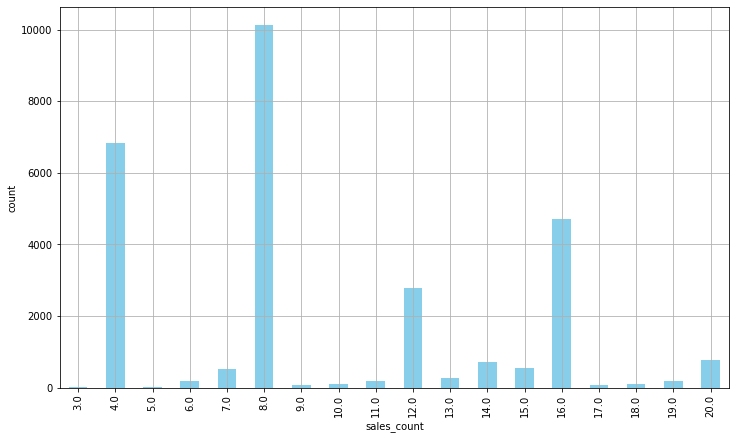

In [ ]:
# We filter on invoicedate_purchase_duration greater than 0
summary_df = summary_df.loc[summary_df['periode_purchase_frequency'] >= 0]

ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(kind='bar', color='skyblue',figsize=(12,7), grid=True)

ax.set_ylabel('count')

plt.show()

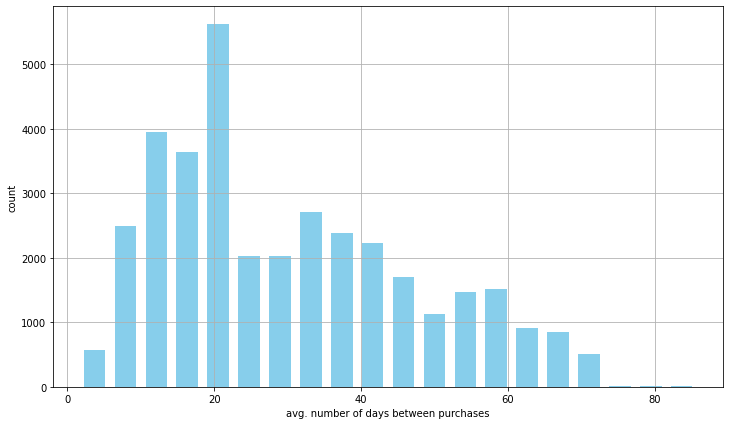

In [ ]:
# Now we create a distribution for the average times between sales
ax = summary_df['periode_purchase_frequency'].hist(bins=20, color='skyblue', rwidth=0.7, figsize=(12,7))

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

# Predicting the 3 month Customer Lifetime Value

In [ ]:
orders_df.head()

Sales             PERIODE
CUSTID INVOINCENO                                  
1      537237      5.954442e+07 2020-12-06 09:58:00
       537643      2.445811e+09 2020-12-07 15:34:00
       539050      6.793920e+05 2020-12-15 16:21:00
       540026      1.670513e+06 2021-01-04 13:25:00
       540856      2.118240e+07 2021-01-12 10:16:00

In [ ]:
# Create summary statistics in 3 month intervals for customer Sales

# Use 3M for 3 month
clv_freq = '3M'

# Groupby customer ID now, and group all invoices for 3 month cycles.
# Aggregate on sum, mean and counts
data_df = orders_df.reset_index().groupby(['CUSTID', pd.Grouper(key='PERIODE', freq=clv_freq)]).agg({
    'Sales': [sum, groupby_mean, groupby_count],})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df.head()

,CUSTID,PERIODE,sales_sum,sales_avg,sales_count
0,1,2020-12-31,2.506035e+09,8.353450e+08,3.0
1,1,2021-03-31,5.665601e+09,5.665601e+08,10.0
2,1,2021-06-30,5.675123e+09,5.675123e+08,10.0
3,1,2021-09-30,2.498475e+09,4.164125e+08,6.0
4,1,2021-12-31,1.134828e+10,7.565522e+08,15.0


In [ ]:
# Adding Recency 'M'

# Get the M
date_month_map = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(sorted(data_df.reset_index()['PERIODE'].unique(), reverse=True))}

# Create our M Column
data_df['M'] = data_df['PERIODE'].apply(lambda x: date_month_map[str(x)[:10]])
data_df.head()

,CUSTID,PERIODE,sales_sum,sales_avg,sales_count,M
0,1,2020-12-31,2.506035e+09,8.353450e+08,3.0,M_5
1,1,2021-03-31,5.665601e+09,5.665601e+08,10.0,M_4
2,1,2021-06-30,5.675123e+09,5.675123e+08,10.0,M_3
3,1,2021-09-30,2.498475e+09,4.164125e+08,6.0,M_2
4,1,2021-12-31,1.134828e+10,7.565522e+08,15.0,M_1


In [ ]:
data_df['M'].unique()

array(['M_5', 'M_4', 'M_3', 'M_2', 'M_1'], dtype=object)

**RFM**

By definition, RFM represents:

- R(ecency): how recently did customer purchase?
- F(rquency): how often do customer purchase?
- M(onetary Value): how much do they spend (each time on average)?

In [ ]:
# Create our Features DF
features_df = pd.pivot_table(data_df.loc[data_df['M'] != 'M_1'], values=['sales_sum', 'sales_avg', 'sales_count'], columns='M', index='CUSTID')

features_df.columns = ['_'.join(col) for col in features_df.columns]

features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CUSTID,,,,,,,,,,,,
1,4.164125e+08,5.675123e+08,5.665601e+08,8.353450e+08,6.0,10.0,10.0,3.0,2.498475e+09,5.675123e+09,5.665601e+09,2.506035e+09
2,1.803459e+09,1.033234e+08,2.223531e+08,4.048761e+08,4.0,18.0,17.0,4.0,7.213837e+09,1.859822e+09,3.780003e+09,1.619505e+09
3,2.717568e+06,4.141760e+05,1.329510e+05,9.766260e+05,2.0,9.0,6.0,3.0,5.435136e+06,3.727584e+06,7.977060e+05,2.929878e+06
4,5.785318e+06,4.251443e+06,6.793920e+06,1.708966e+06,4.0,4.0,2.0,2.0,2.314127e+07,1.700577e+07,1.358784e+07,3.417932e+06
5,9.258696e+06,5.484795e+06,7.457112e+06,4.282560e+06,8.0,7.0,4.0,2.0,7.406957e+07,3.839357e+07,2.982845e+07,8.565120e+06


In [ ]:
# Create our Response DF
response_df = data_df.loc[data_df['M'] == 'M_1', ['CUSTID', 'sales_sum']]

response_df.columns = ['CUSTID', 'CLV_'+clv_freq]
response_df.head()

,CUSTID,CLV_3M
4,1,1.134828e+10
9,2,4.549158e+07
14,3,2.020032e+06
19,4,1.087027e+07
24,5,2.717568e+06


In [ ]:
# Create our Sample Set by merging features with response_df
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CUSTID',
    how='left'
)

sample_set_df = sample_set_df.fillna(0)
sample_set_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CUSTID,CLV_3M
4.0,4.164125e+08,5.675123e+08,5.665601e+08,8.353450e+08,6.0,10.0,10.0,3.0,2.498475e+09,5.675123e+09,5.665601e+09,2.506035e+09,1,1.134828e+10
9.0,1.803459e+09,1.033234e+08,2.223531e+08,4.048761e+08,4.0,18.0,17.0,4.0,7.213837e+09,1.859822e+09,3.780003e+09,1.619505e+09,2,4.549158e+07
14.0,2.717568e+06,4.141760e+05,1.329510e+05,9.766260e+05,2.0,9.0,6.0,3.0,5.435136e+06,3.727584e+06,7.977060e+05,2.929878e+06,3,2.020032e+06
19.0,5.785318e+06,4.251443e+06,6.793920e+06,1.708966e+06,4.0,4.0,2.0,2.0,2.314127e+07,1.700577e+07,1.358784e+07,3.417932e+06,4,1.087027e+07
24.0,9.258696e+06,5.484795e+06,7.457112e+06,4.282560e+06,8.0,7.0,4.0,2.0,7.406957e+07,3.839357e+07,2.982845e+07,8.565120e+06,5,2.717568e+06


# Using Linear Regression

In [ ]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Our Target Variable
target_var = 'CLV_'+clv_freq

# Our Features
all_features = [x for x in sample_set_df.columns if x not in ['CUSTID', target_var]]

# Split data in Train and Test
x_train, x_test, y_train, y_test = train_test_split(sample_set_df[all_features], sample_set_df[target_var], test_size=0.3)

# Fit Model
reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Get our y intercept
reg_fit.intercept_

-49016083.66368866

In [ ]:
# Get our coefficents
reg_fit.coef_

array([-2.74492377e+00,  3.34429759e+00, -2.15673874e+00, -7.65957909e-01,
        1.01781392e+07,  1.10375616e+08, -7.84913549e+07, -1.69596120e+08,
       -5.66137769e-01, -1.06740896e+00,  2.97954945e+00,  2.90334006e+00])

In [ ]:
# Show them here per feature
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_avg_M_2,-2.744924e+00
1,sales_avg_M_3,3.344298e+00
2,sales_avg_M_4,-2.156739e+00
3,sales_avg_M_5,-7.659579e-01
4,sales_count_M_2,1.017814e+07
5,sales_count_M_3,1.103756e+08
6,sales_count_M_4,-7.849135e+07
7,sales_count_M_5,-1.695961e+08
8,sales_sum_M_2,-5.661378e-01
9,sales_sum_M_3,-1.067409e+00


In [ ]:
# Run our input data into our model predictors
train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

In [ ]:
# Assess performance Training Data
from sklearn.metrics import r2_score, median_absolute_error

print(r2_score(y_true=y_train, y_pred=train_preds))
print(median_absolute_error(y_true=y_train, y_pred=train_preds))

0.973279983755843
76349123.42144358


In [ ]:
# Compare R-Squared Performance on Training and Test Datasets
print('In-Sample R-Squared: %0.4f' % r2_score(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true = y_test, y_pred = test_preds))

In-Sample R-Squared: 0.9733
Out-of-Sample R-Squared: 0.9237


In [ ]:
# Compare MSE on Training and Test Datasets
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true = y_test, y_pred = test_preds))

In-Sample MSE: 76349123.4214
Out-of-Sample MSE: 78727210.1055


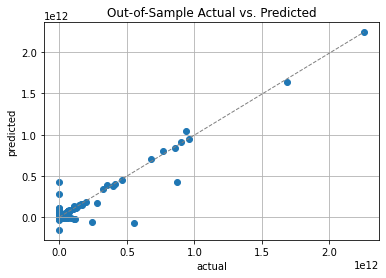

In [ ]:
# Plot the predicted vs actual values using our Test Dataset
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()